In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset

dataset = pd.read_excel('Linear Regression.xlsx',sheet_name=0)
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# 1) Regression model for sqft_living and price

In [10]:
# checking for any null values in price
dataset['price'].isna().sum()

0

In [11]:
# checking for any null values in sqft_living
dataset['sqft_living'].isna().sum()

0

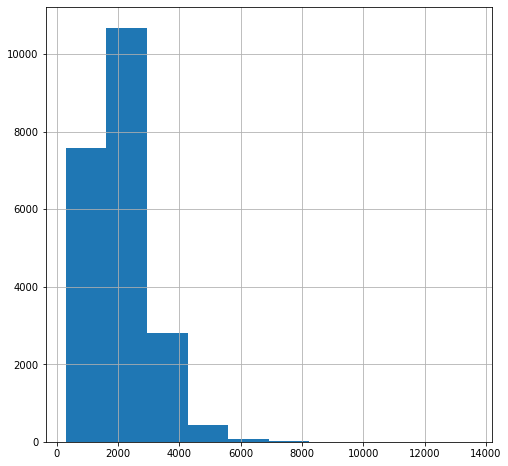

In [18]:
# determining density of records for different range of values for the Independent variable
dataset['sqft_living'].hist(figsize = (8,8))

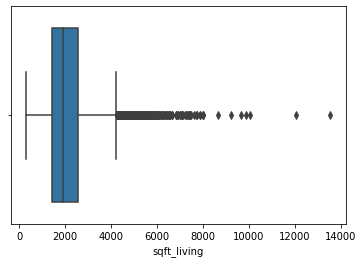

In [23]:
# outlier deduction for Independent variable
sns.boxplot(dataset['sqft_living'])

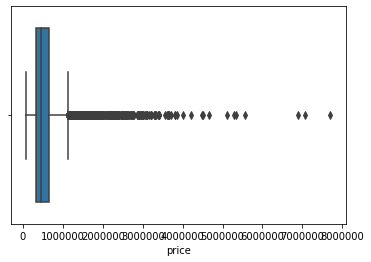

In [28]:
# outlier deduction for Dependent variable
sns.boxplot(dataset['price'])

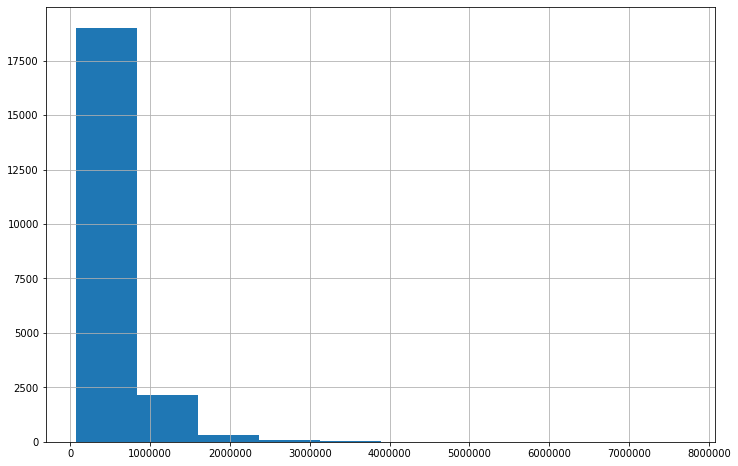

In [25]:
# determining density of records for different range of values for the Dependent variable
dataset['price'].hist(figsize = (12,8))

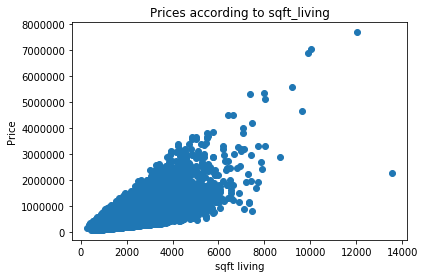

In [29]:
# determining correlation between the two variables

plt.scatter(dataset['sqft_living'],dataset['price'])
plt.title('Prices according to sqft_living')
plt.xlabel('sqft living')
plt.ylabel('Price')
plt.show()

In [30]:
# inference : positive correlation due to upward curve.
# Perfom calculations to justify observations

from scipy.stats import pearsonr

stats,p = pearsonr(dataset.sqft_living , dataset.price)
stats,p

(0.7020350524336835, 0.0)

In [31]:
# p (probability value fr hypothesis testing is greater than o.o5)
# stats (r value (also called the correlation coeffecient is 0.07) ) hence positive correlation

### split records into x and y

In [34]:
x = dataset.iloc[: , 1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [35]:
y = dataset.iloc[:, 0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


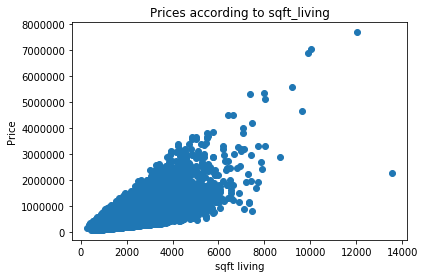

In [36]:
# re-visualizing dataset

plt.scatter(x,y)
plt.title('Prices according to sqft_living')
plt.xlabel('sqft living')
plt.ylabel('Price')
plt.show()


### split the records for training and testing

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2 , random_state = 2)
# allocated 20% of data for testing and 80% for training

In [41]:
dataset.shape

(21613, 5)

In [42]:
x_train.shape

(17290, 1)

In [43]:
x_test.shape

(4323, 1)

In [44]:
y_train.shape

(17290, 1)

In [45]:
y_test.shape

(4323, 1)

### model building with sklearn

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Model building is complete.Time to find slope and constant
print('The slope/co-effecient is ', lin_reg.coef_)
print('The constant/intercept is ' , lin_reg.intercept_)

The slope/co-effecient is  [[280.67382569]]
The constant/intercept is  [-42568.70358496]


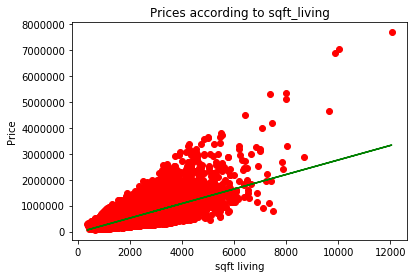

In [49]:
# visulizing training set result

plt.scatter(x_train,y_train , color='red')
plt.plot(x_train,lin_reg.predict(x_train) , color ='green')
plt.title('Prices according to sqft_living')
plt.xlabel('sqft living')
plt.ylabel('Price')
plt.show()


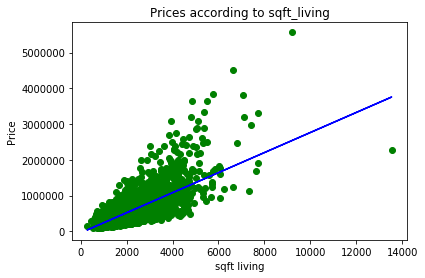

In [50]:
# visualizing test set result

plt.scatter(x_test,y_test , color='green')
plt.plot(x_test,lin_reg.predict(x_test) , color ='blue')
plt.title('Prices according to sqft_living')
plt.xlabel('sqft living')
plt.ylabel('Price')
plt.show()


### Testing the model

In [55]:
x_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


In [56]:
y_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [54]:
ypred = lin_reg.predict(x_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

### Estimating cost

In [57]:
from sklearn.metrics import mean_squared_error,r2_score

RMSE = mean_squared_error(y_test,ypred)
r_square = r2_score(y_test,ypred)

print('The R square value is....' ,r_square)
print('The RMSE value is...',RMSE)

The R square value is.... 0.5031163723285275
The RMSE value is... 69369025399.88107
